In [1]:
import numpy as np
import pandas as pd

In [2]:
from utils import get_range, get_metrics
from models import NaiveSharpe

In [3]:
# Past date range
past_start_date = "2023-01-31"
past_end_date = "2024-01-30"

# Future date range
future_start_date = "2024-01-31"
future_end_date = "2025-01-30"

c:\Users\zeyuan\OneDrive\Desktop\qrt-paper-trading\spx\utils.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = price_df.pct_change()


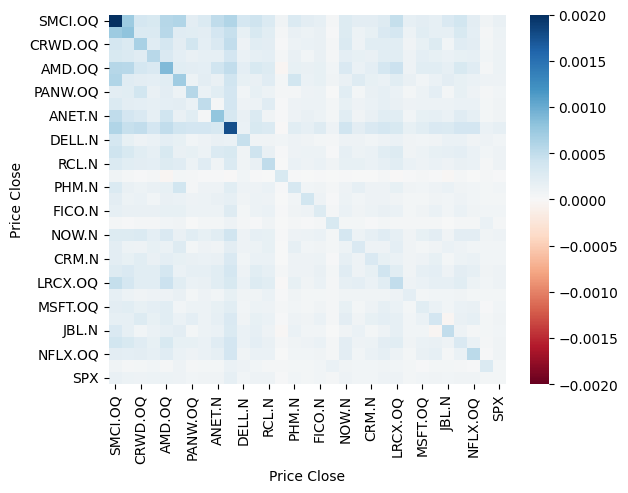

In [4]:
# Load in the full price dataframes
price_df = pd.read_pickle("./spx-past-3-years/spx_past_3_years")
index_price_df = pd.read_pickle("./spx-past-3-years/spx_index_past_3_years")

# Get prices for selected date ranges
past_price_df = get_range(past_start_date, past_end_date, price_df)
past_spx_df = get_range(past_start_date, past_end_date, index_price_df)

# Join stocks and index dataframes
past_price_df = pd.concat([past_price_df, past_spx_df], axis=1)

# Get metrics for past price history
daily_returns, daily_log_returns, \
annualised_returns, annualised_log_returns, \
top_n_stocks, covariance_matrix = get_metrics(past_price_df, n=30, show=True)

OPTIMIZED SHARPE RATIO:
--------------------------------------------------------------------------------
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.2852427826270274
       x: [ 3.752e-02  4.757e-02 ...  5.190e-17  6.808e-17]
     nit: 16
     jac: [ 1.344e-03 -7.349e-04 ...  3.029e-01  4.093e-02]
    nfev: 509
    njev: 16
--------------------------------------------------------------------------------


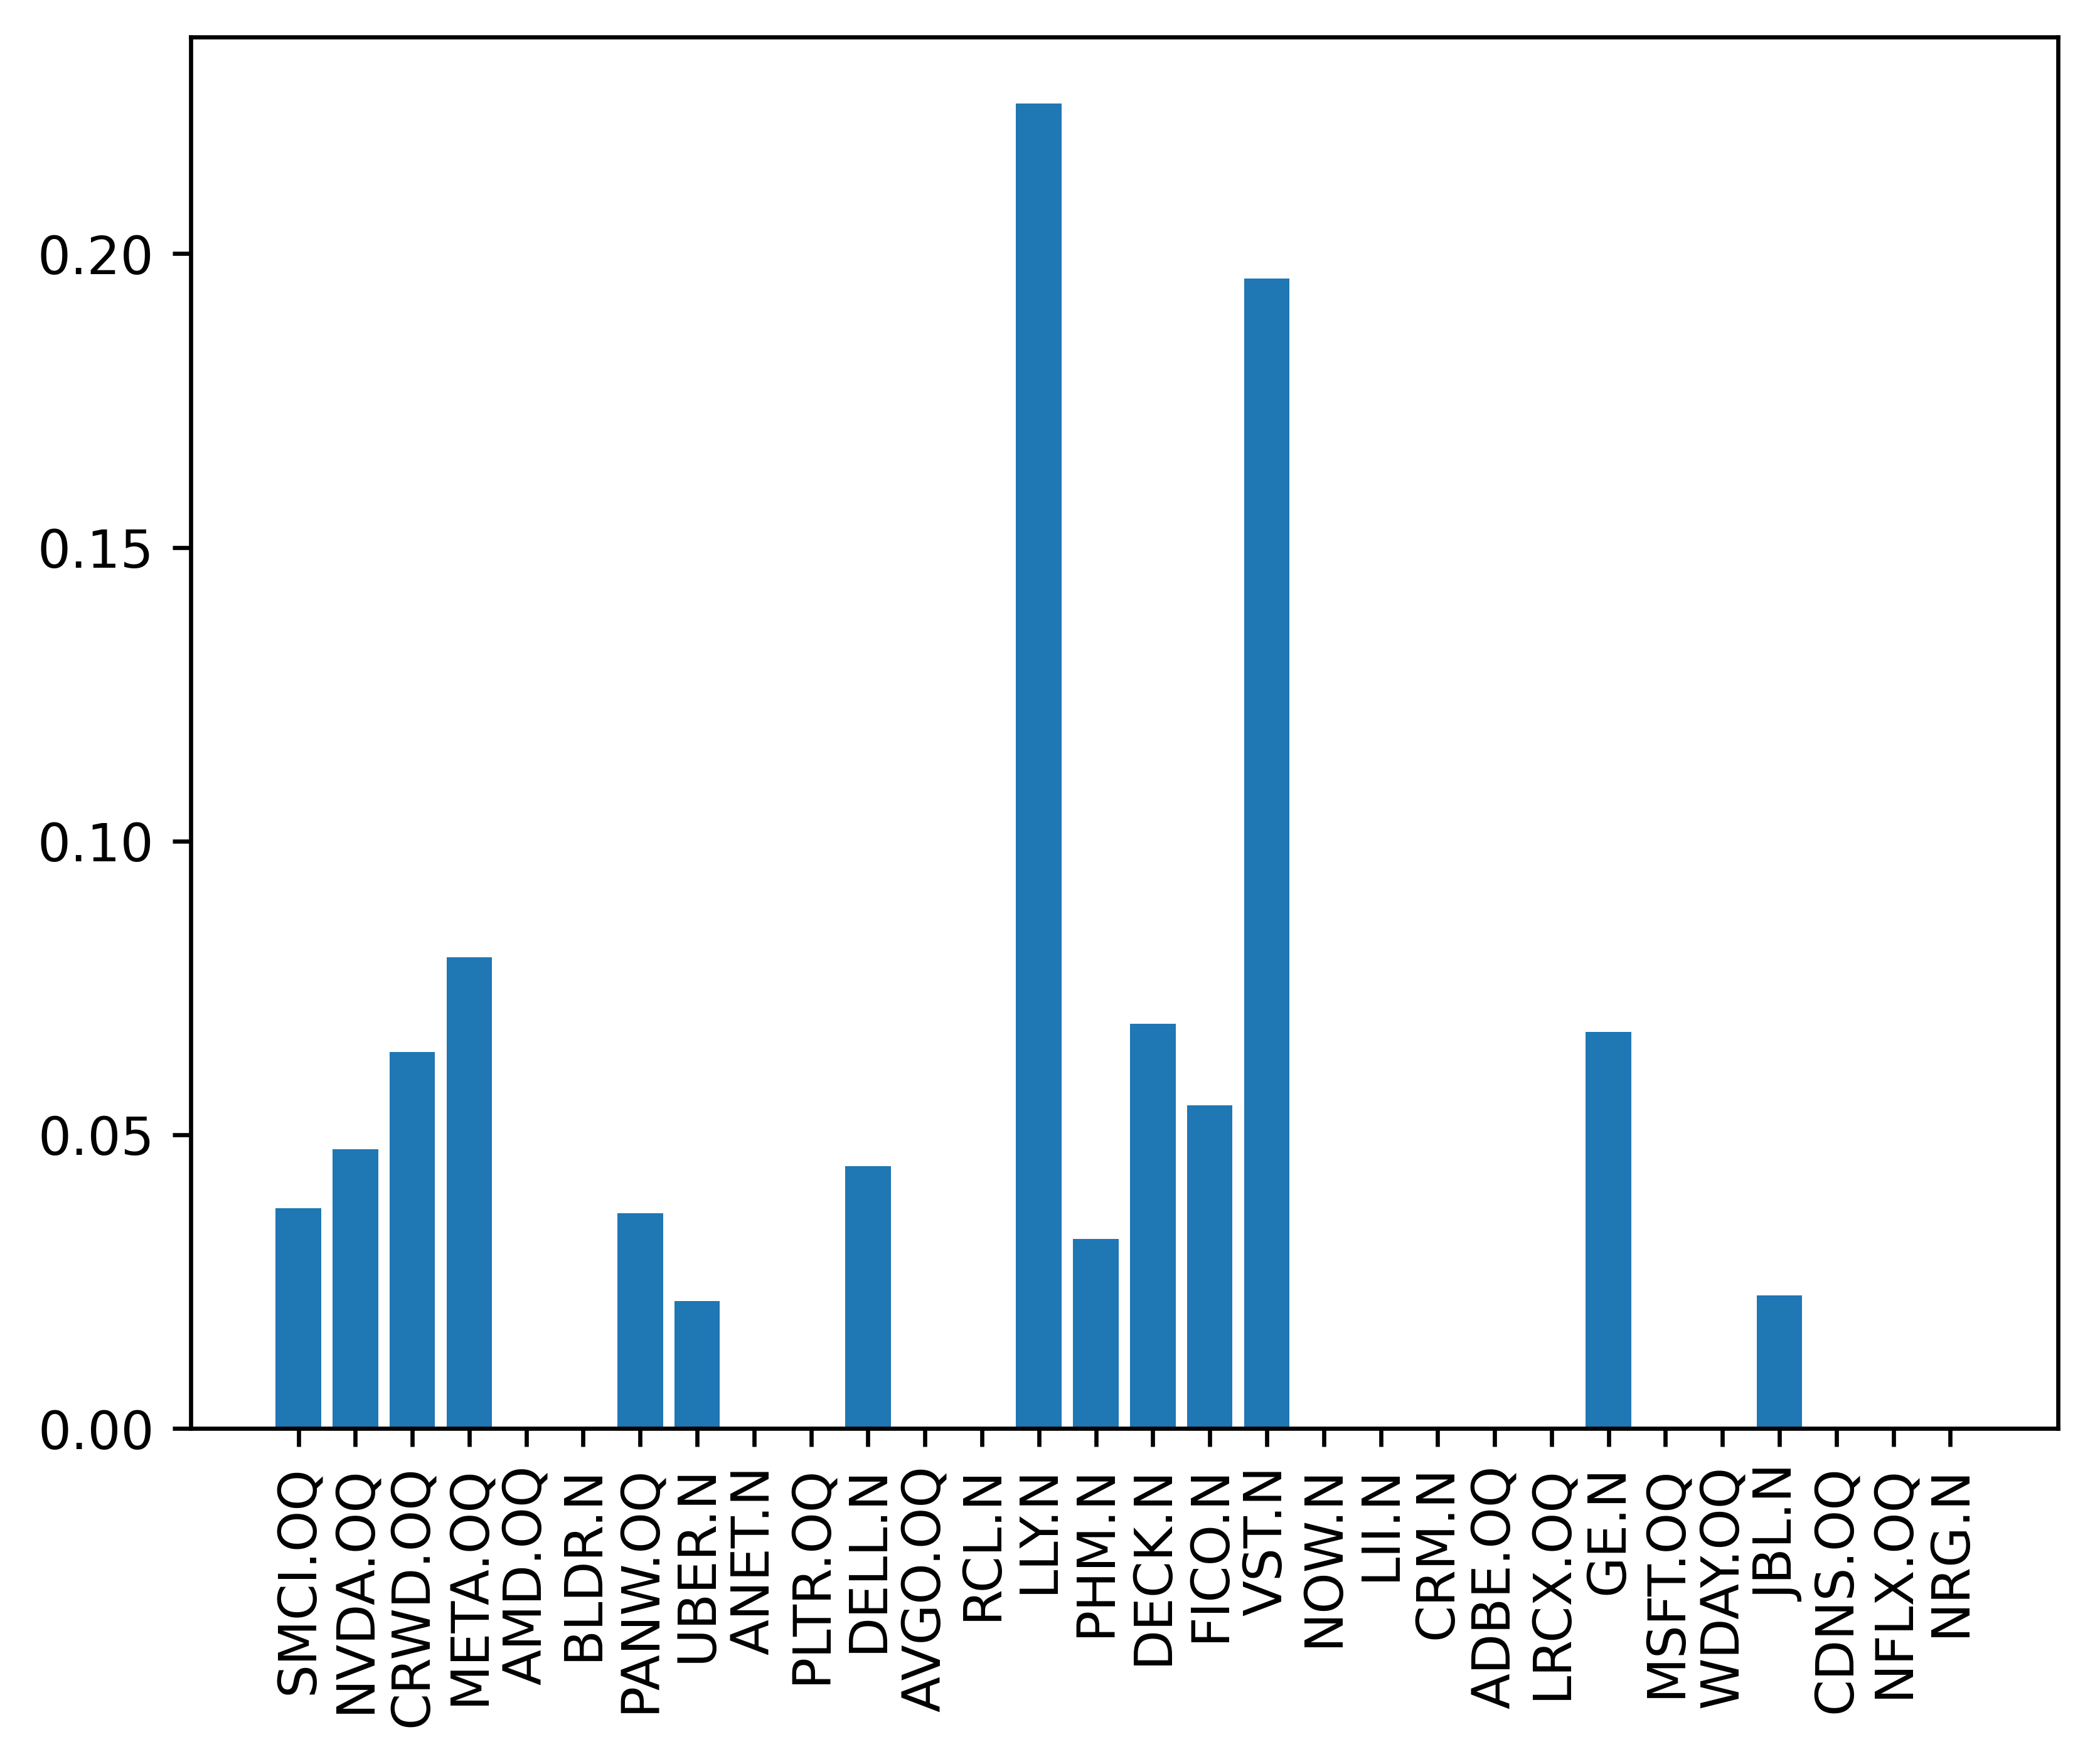

In [6]:
naive_model = NaiveSharpe(annualised_log_returns, top_n_stocks, covariance_matrix)
naive_model.optimise()

In [7]:
naive_model.hedge()

### Load future price data

In [8]:
# Get prices for selected date ranges
future_price_df = get_range(future_start_date, future_end_date, price_df)
future_spx_df = get_range(future_start_date, future_end_date, index_price_df)

# Join stocks and index dataframes
future_price_df = pd.concat([future_price_df, future_spx_df], axis=1)

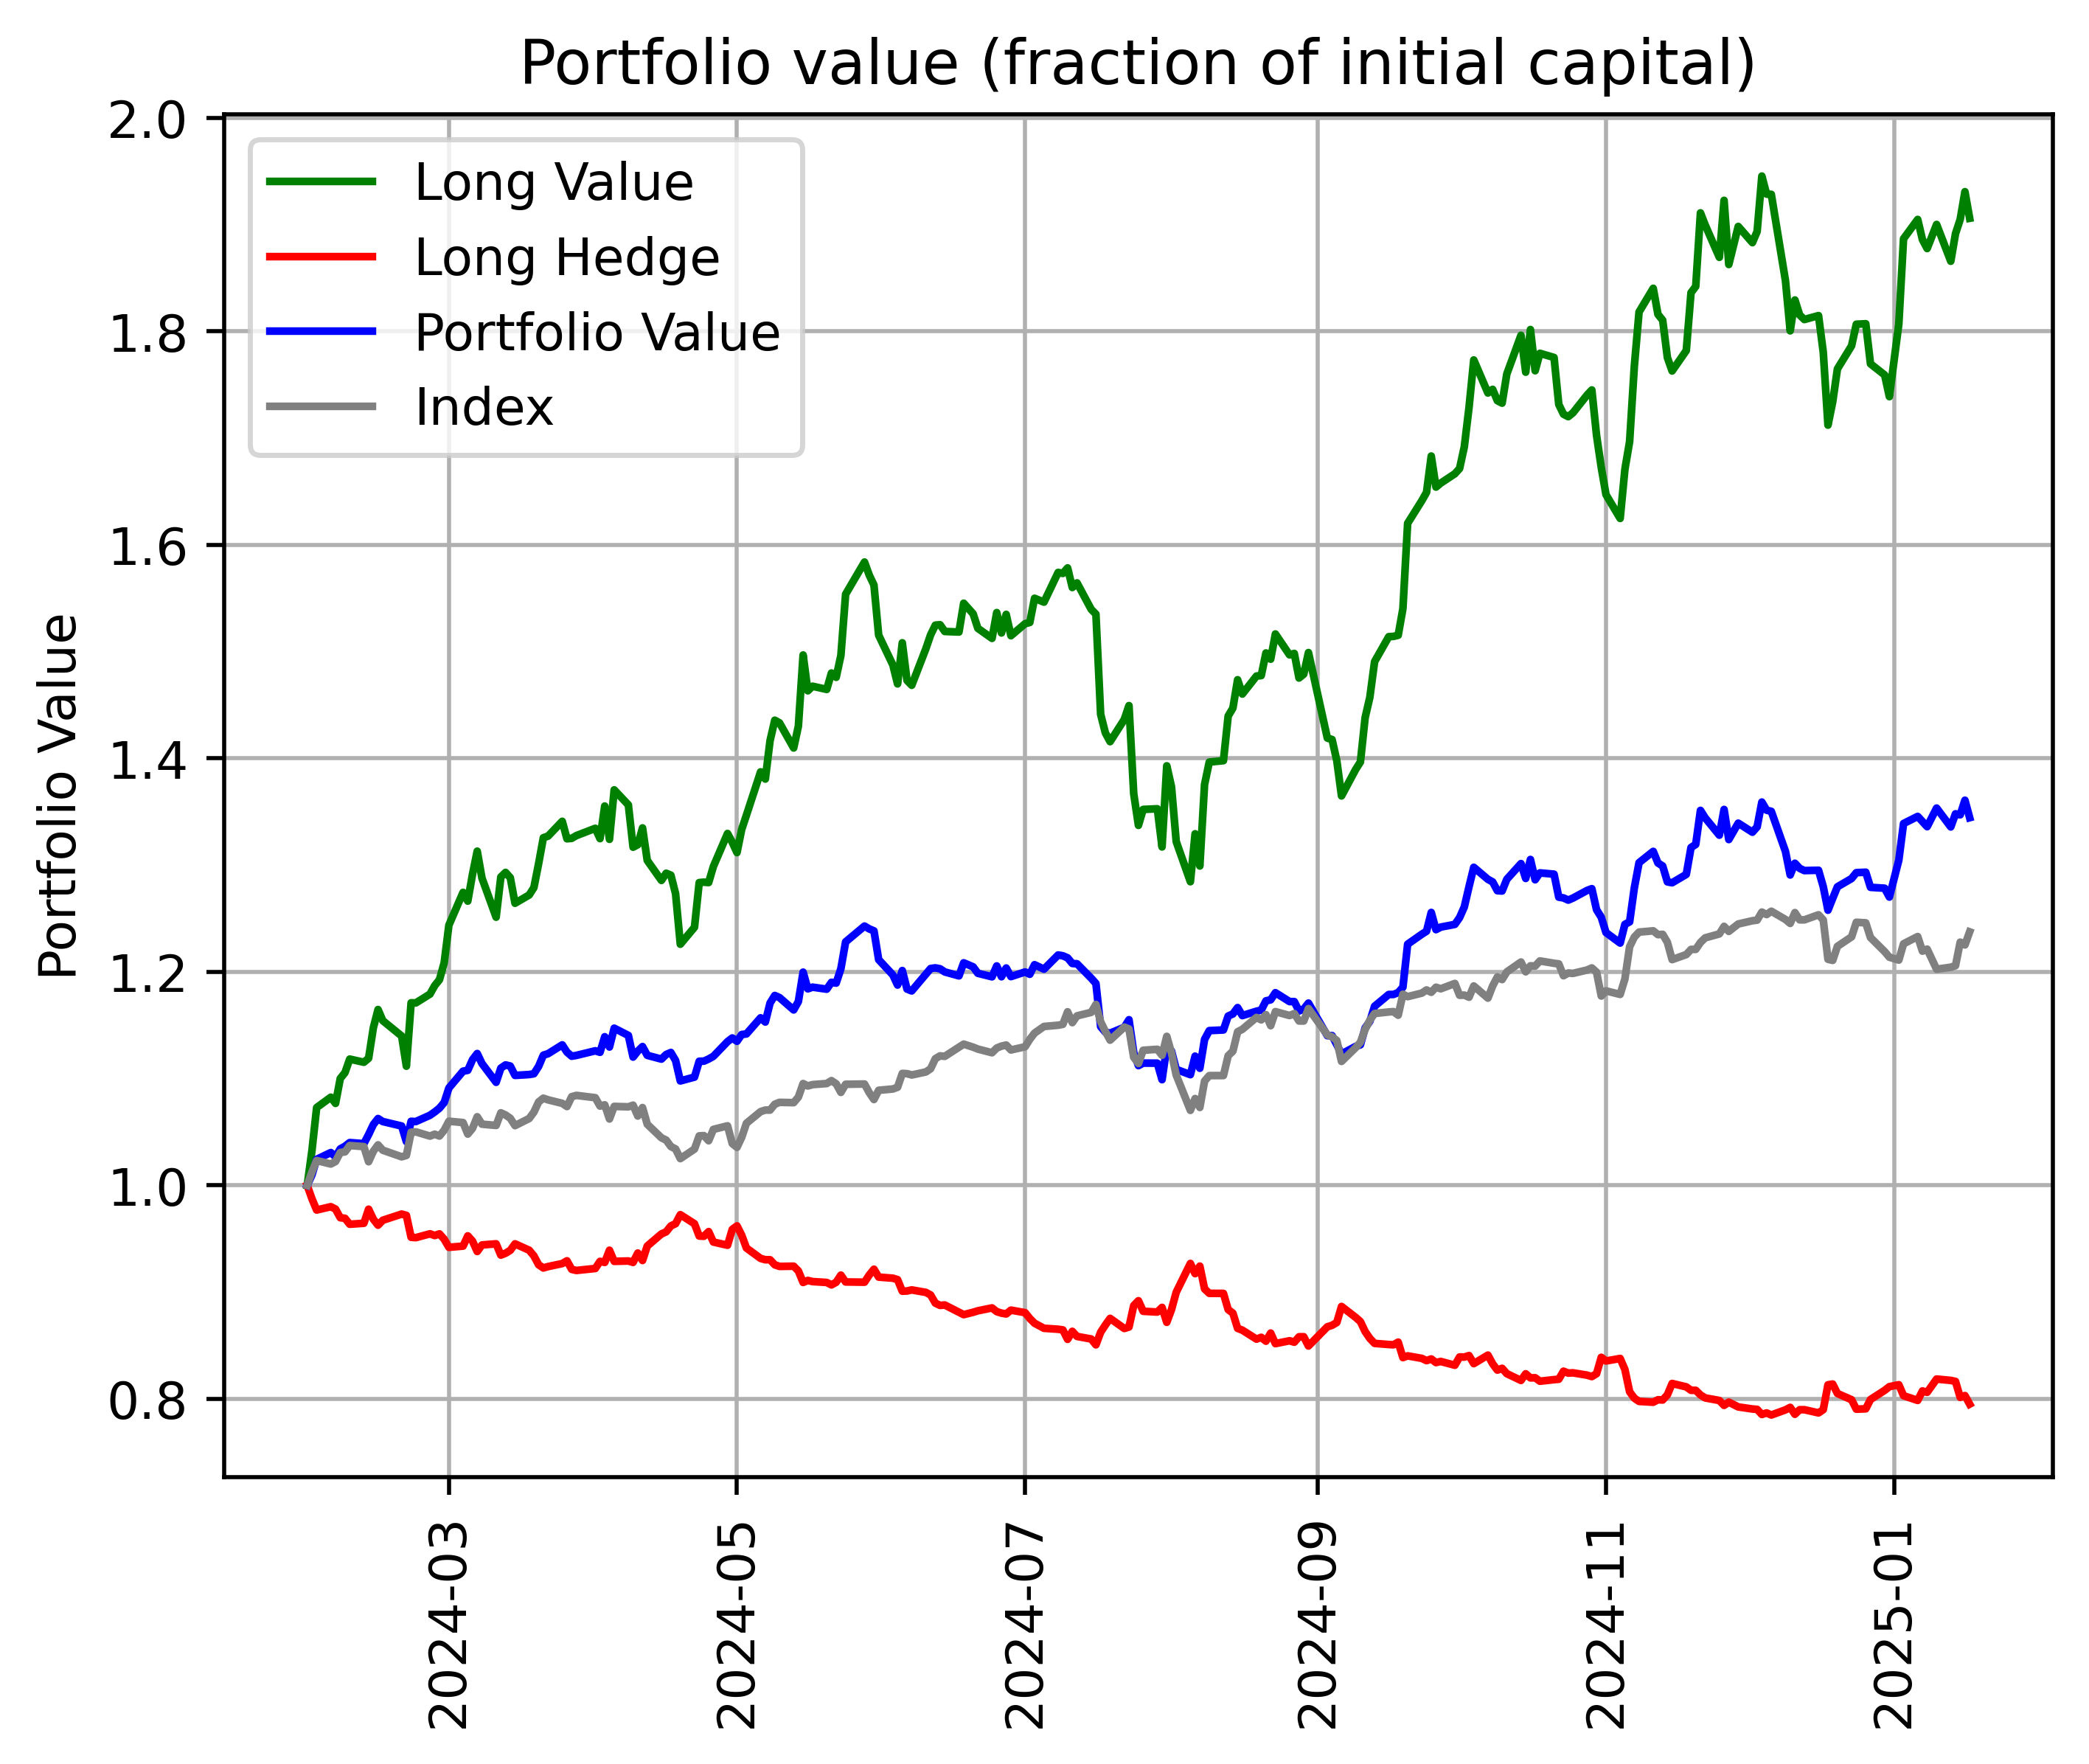

Index Sharpe:  1.8395763047166993
Portfolio Sharpe:  2.1012364078926424
Correlation:  0.48472972465824615


In [9]:
naive_model.backtest(future_price_df)